<a href="https://colab.research.google.com/github/weilee0622/Pima-indians-diabetes-classification-using-single-perceptron/blob/master/Pima%20indians%20diabetes%20classification%20using%20single%20perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
train = pd.read_csv('pima-indians-diabetes.csv', header=None, names=col_names)

In [ ]:
train.shape

(768, 9)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima = pd.read_csv('/content/drive/MyDrive/datasets/pima-indians-diabetes.csv', header=None, names=col_names)

In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Selecting Feature (important feature)
features = ['pregnant','glucose','bp','insulin','bmi','pedigree','age']

X = pima[features]
y = pima['label']

print(X.shape)
print(y.shape)

(768, 7)
(768,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
#Create a perceptron object
from sklearn.linear_model import Perceptron

pct = Perceptron(max_iter=100, eta0=0.005, random_state=0)

#Train the perceptron
pct.fit(X_train, y_train)

#Call the predict function
y_pred = pct.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.65625


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Model Evaluation using confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[96 28]
 [38 30]]


Text(0.5, 257.44, 'Predicted label')

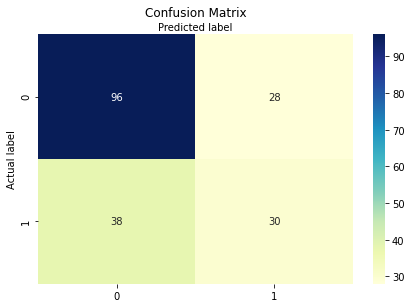

In [ ]:
#Visualize confusion matrix using heatmap
class_names = [0, 1]

fig, ax = plt.subplots()
tick_names = np.arange(len(col_names))
#Plot the label
plt.xticks(tick_names, col_names)
plt.yticks(tick_names, col_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred))

Accuracy: 0.65625
Precision: 0.5172413793103449
Recall: 0.4411764705882353
